# 1. Introdução

## 1.1 Resumo

Quando falamos em ciência de dados, pensamos em super computadores, máquinas trabalhando de maneira autonoma, várias fórmulas matemáticas assustadoras, etc. Porém acabamos esquecendo que ela está o tempo todo em nosso dia a dia e que podemos usar em diferentes setores da indústria, como logística, finanças, entretenimento e até mesmo na medicina.

Um exemplo nessa área que os algoritmos de Machine Learning são muito utilizados é a parte de Drug discovery. Essa é uma das práticas mais antigas da nossa sociedade, com aproximadamente 5000 anos [1]. Atualmente, o processo de descobrimento é dividido em 3 partes: pesquisa, desenvolvimento e aprovação [2], e os algoritmos são usados na parte de pesquisa como forma de automatizar os processos de identificação de novos compostos. 

Nesse projeto será utilizado uma amostra de dados sobre testes de drogas em células, que foi fornecido pela Alura para realizar sua terceira imersão de dados. Os dados foram utilizados no desafio do laboratório de inovação e ciência de Harvard e fornecem informações genéricas como quantidade de droga dosada, tempo de dosagem, tipo de droga ou até mesmo informações mais específicas como genes presentes em cada célula, que precisam de um certo dominio na área para tratá-los.

## 1.2 Objetivo

A tuberculose é uma doença infecciosa e transmissível que afeta prioritariamente os pulmões, é causada pelo Mycobacterium tuberculosis ou bacilo de Koch e cerca de 10 milhões de pessoas adoecem por tuberculose no mundo, e a doença leva mais de um milhão de pessoas a óbito anualmente [3]. Seu tratamento é feito principalmente com a Rifampicina e seu custo é por volta de U$10 [4]. Por esse motivo é sempre bom descobrir novas substâncias que possam ser utilizados como forma de tratamento alternativo.

O objetivo desse projeto é trabalhar em cima dos dados de testes, aplicando técnicas de limpeza, exploração e manipulação de dados para tentar descobrir relações não triviais entre parâmetros, e ao final realizar um modelo de Machine Learning que consiga identificar novas possíveis substâncias que possam ser utilizadas para o tratamento da tuberculose.

# 2. Conhecendo os dados

Como comentado na sessão anterior, a amostra de dados apresentam desde informações mais gerais até as mais específicas. Sendo assim, essa sessão tem como intuito a apresentação e um melhor entendimento dos dados, mostrando os números de linha e colunas, tipo de features(categórica ou númerica), cardinalidade das features categóricas e suas distribuições. 

## 2.1 Importando bibliotecas

Começando pelas bibliotecas, nessa sessão usaremos a Pandas e a Numpy, duas bibliotecas famosas por sua capacidade de trabalhar com dados. 

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 2.2 Importando os dados

Os dados estão disponíveis na página do Github da Alura e podem ser acesados [neste link](https://github.com/alura-cursos/imersaodados3). Como podemos ver, há dois datasets, um referente aos testes e outro aos resultados, que estão conectados pela coluna "id". Para importa-los, usaremos a função *read_csv()* do Pandas, colocando a URL com os dados e alterando o parâmetro *compression* para 'zip' no dataset dos testes, informando o tipo de arquivo da URL. Utilizando a função *head()*, é possível ver as 5 primeiras linhas do Dataframe e com *shape* é possível ver o número de linhas e o números de colunas.

In [ ]:
dados_teste = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')
dados_teste.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados_teste.shape

(23814, 877)

Como python nem sempre consegue interpretar o "-" como uma string, para evitar problemas posteriores, vamos mudar por "_" utilizando a função *replace()*.

In [ ]:
nome_das_colunas = dados_teste.columns

novo_nome_coluna = []
for coluna in nome_das_colunas:
  coluna = coluna.replace('-', '_')
  novo_nome_coluna.append(coluna)
dados_teste.columns = novo_nome_coluna 
dados_teste.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_resultados.shape

(23814, 207)

## 2.3 Construindo o Dataset

A Rifampicina é utilizada como tratamento como tuberculose pois ela iníbe o RNA polimerase, impedindo que a bactéria se replique. Sendo assim, olharemos somente para a coluna "rna_polymerase_inhibitor" dos dados de resultado. Utilizando a função *join()* do pandas, juntaremos as tabelas seguindo a coluna "id".

In [ ]:
data = dados_teste.join(dados_resultados['rna_polymerase_inhibitor'])
data.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,rna_polymerase_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0


In [ ]:
data.shape

(23814, 878)

## 2.4 Informações adicionais

Podemos ver que temos um grande número de colunas e se fomos um pouco mais a fundo, podemos ver que existem 772 colunas com nome 'g-n' e 100 colunas com 'c-n', isso porque as colunas 'g-n' representam cada gene presente na célula e o tipo de célula que a droga foi testada (saudável, cancerígena, célula óssea, célula tronco etc), respectivamente. Sendo assim, podemos ver que somente as colunas tratamento, tempo, dose e droga são categóricas, enquanto as demais são colunas númericas contínuas (Float).

Agora que ja vimos como os dados organizados, vamos a uma breve legenda para que descrevam as colunas:
*   id: Código de identificação do teste;
*   tratamento: Teste foi realizado com ou sem droga;
*   tempo: Tempo de observação do teste em horas;
*   dose: Quantidade da droga utilizada;
*   droga: Droga utilizada no tratamento;
*   g-n's: Quantidade do gene n produzido com o estimulo da droga;
*   c-n's: Resposta da célula n à droga.
*   rna_polymerase_inhibitor: Booleano de drogas conseguem inibir o RNA polimerase.

Vamos agora observar o tipo de dados dessas categorias, excluindo as "g-n's"  e as "c-n's" que são contínuas, e a quantidade de valores distintos em cada.


In [ ]:
data[['id','tratamento', 'tempo', 'dose', 'droga', 'rna_polymerase_inhibitor']].dtypes

id                          object
tratamento                  object
tempo                        int64
dose                        object
droga                       object
rna_polymerase_inhibitor     int64
dtype: object

In [ ]:
for i in ['tratamento', 'tempo', 'dose', 'droga', 'rna_polymerase_inhibitor']:
  print('A categoria "{}" possui {} valores distintos'.format(i, len(data[i].unique())))

A categoria "tratamento" possui 2 valores distintos
A categoria "tempo" possui 3 valores distintos
A categoria "dose" possui 2 valores distintos
A categoria "droga" possui 3289 valores distintos
A categoria "rna_polymerase_inhibitor" possui 2 valores distintos


Como podemos ver, as categorias "tratamento", "tempo" e "dose" são colunas de baixa cardinalidade, ou seja, poucos valores distintos, enquanto a coluna "droga" é de alta cardinalidade. Sendo assim, podemos ver como estão distribuidos nessas categorias. Para isso, usaremos a função *value_counts()*, com o parâmetro *normalize* como True, para olhar a porcentagem e como a coluna "droga" possui muitas categorias, olharemos somente as 10 mais presentes. 

In [ ]:
data['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [ ]:
data['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

In [ ]:
data['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [ ]:
data['rna_polymerase_inhibitor'].value_counts(normalize = True)

0    0.99895
1    0.00105
Name: rna_polymerase_inhibitor, dtype: float64

In [ ]:
data['droga'].value_counts(normalize = True).head(10)

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
d08af5d4b    0.008230
292ab2c28    0.008146
d50f18348    0.007811
d1b47f29d    0.007475
67c879e79    0.000798
Name: droga, dtype: float64

Um ponto a ser observado é o fato dass colunas "tempo" e "dose" estão bem distribuidas, enquanto as categorias "tratamento" e "rna_polymerase_inhibitor" não estão. Isso se da ao fato de que testes que não são aplicados nenhuma droga são chamados de controle e um mesmo teste de controle pode ser usado para vários outros testes e que é normal somente algumas drogas possuírem uma característica específica. Outra observação é que a droga 'cacb2b860' apresenta exatamente a mesma proporção dos testes que foram realizados como controle. Vamos ver se é pura coincidência ou se realmente esse composto foi a base de controle

In [ ]:
data.query('tratamento == "com_controle"')['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Como podemos ver, realmente esse composto é o que foi utilizado para ser como controle

Agora que já entendemos melhor esses dados mais gerais, vamos olhar as colunas g-n's e c-n's. Como são muitas colunas, faremos de uma maneira diferente. Ao invés de olharmos individualmente, iremos olhar como elas se comportam em grupo, analizando sua média, seu desvio padrão, valores mínimos e máximos. Para isso, usaremos a função *describe()* do pandas e as bibliotecas **Matplotlib.pyplot** e **Seaborn** para a vizualização desses dados atraves de gráficos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g_describe = data.loc[:, 'g_0': 'g_771'].describe().T
g_describe.head()

,count,mean,std,min,25%,50%,75%,max
g_0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g_1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g_2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g_3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g_4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000


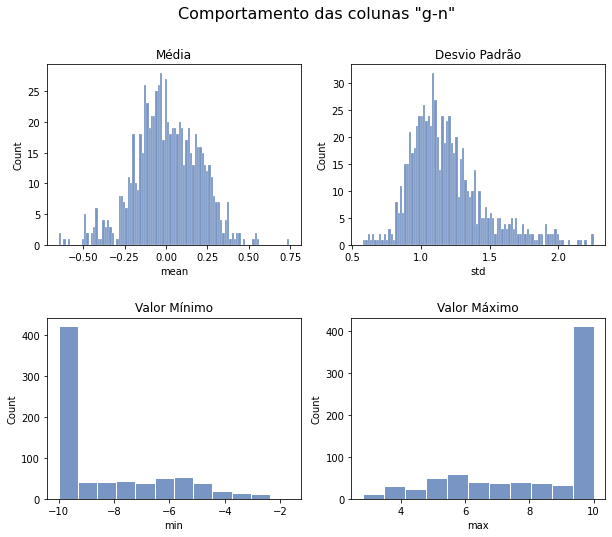

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Comportamento das colunas "g-n"', fontsize = 16)
plt.subplots_adjust(hspace = 0.4)
sns.set()

sns.histplot(ax=axes[0][0], x = g_describe['mean'], bins = 100)
axes[0][0].set_title('Média', fontsize = 12)

sns.histplot(ax=axes[0][1], x = g_describe['std'], bins = 100)
axes[0][1].set_title('Desvio Padrão', fontsize = 12)

sns.histplot(ax=axes[1][0], x = g_describe['min'])
axes[1][0].set_title('Valor Mínimo', fontsize = 12)

sns.histplot(ax=axes[1][1], x = g_describe['max'])
axes[1][1].set_title('Valor Máximo', fontsize = 12)

plt.show()

Como podemos ver, a médias e o desvio padrão estão aparentanda ser curvas normais e os valores mínimos e máximos estão em -10 e 10, respectivamente. Logo podemos imaginar que as colunas 'g-n' apresentam um comportamento de curva normal, isto é, apresentam média 0 e desvio padrão -1. 

Vamos agora realizar o mesmo processo com as colunas c-n's.

In [ ]:
c_describe = data.loc[:, 'c_0': 'c_99'].describe().T
c_describe.head()

,count,mean,std,min,25%,50%,75%,max
c_0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c_1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c_2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c_3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c_4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555


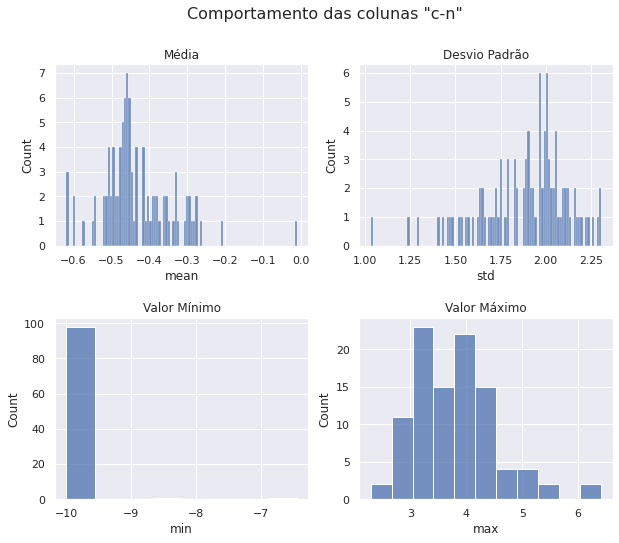

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Comportamento das colunas "c-n"', fontsize = 16)
plt.subplots_adjust(hspace = 0.4)
sns.set()

sns.histplot(ax=axes[0][0], x = c_describe['mean'], bins = 100)
axes[0][0].set_title('Média', fontsize = 12)

sns.histplot(ax=axes[0][1], x = c_describe['std'], bins = 100)
axes[0][1].set_title('Desvio Padrão', fontsize = 12)

sns.histplot(ax=axes[1][0], x = c_describe['min'])
axes[1][0].set_title('Valor Mínimo', fontsize = 12)

sns.histplot(ax=axes[1][1], x = c_describe['max'])
axes[1][1].set_title('Valor Máximo', fontsize = 12)

plt.show()

Como podemos ver, diferente das colunas g-n's, não podemos falar que as colunas c-n' são uma curva normal, já que suas médias não se encontram em 0 e seus divios padrão em 1. 

# 3. Limpeza dos dados

Alguns modelos de Machine Learning são extremamente sensíveis às impurezas (outliers, dados nulos, dados duplicados), então precisamos limpa-los para que nosso modelo tenha uma melhor performance sem que haja um super adequamento (overfitting) aos dados.

## 3.1 Dados Duplicados

A primeira técnica de limpeza é a remoção, caso haja, de dados duplicados. Precisamos retirá-los, pois eles podem ser responsáveis por alterar estatísticas como média, mediana etc, para isso, basta usar a função *drop_duplicates()* do pandas e ela removerá todas as  linhas em que todas as colunas são iguais.

In [ ]:
data_sem_duplicados = data.drop_duplicates(keep='last')
print('Número de linhas deletadas: {}'.format(len(data)-len(data_sem_duplicados)))

Número de linhas deletadas: 0


## 3.2 Dados Nulos

Dados nulos são outros tipos de dados que precisam ser removidos ou manipulados, caso haja. Para isso, cada coluna deve ser tratada de uma forma, então vamos ver se há alguma coluna com dados faltando.

In [ ]:
for i in data_sem_duplicados.isnull().sum():
  if(i != 0):
    print('{}'.format(i.index))

Portanto não há colunas sem dados nulo e podemos seguir

## 3.3 Outliers


Por fim, precisamos limpar as anomalias, ou outliers, que podem tanto serem causados por errors humanos tanto por causa natural, como é o caso dos nossos dados, já que são resultados de testes de drogas em células. Podemos ver que nossos dados apresentam outliers usando o *boxplot()* da biblioteca **Seaborn** na coluna "g-0",por exemplo.

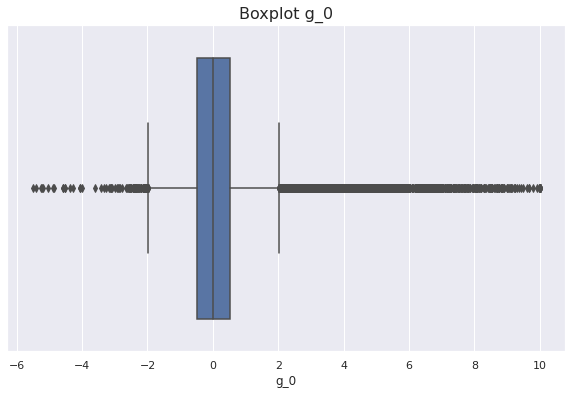

In [ ]:
plt.figure(figsize = (10,6))
plt.title('Boxplot g_0', fontsize = 16)
sns.boxplot(data = data, x = 'g_0')
plt.show()

Nesse gráfico, todos os pontos que estão acima de 2 e abaixo de -2 são considerados outliers. 

Para achar e tentar diminuir esses outliers, vamos usar o algoritmo *IsolationForest()* da biblioteca **Sklearn**. Apesar de ser baseado no modelo *DecisionTree()*, esse algoritmo é não supervisionado e divide os dados aleatoriamente e detecta como outliers aqueles pontos que tiverem menor caminho, porém como não queremos retirar nenhum ponto que tenha reultado positivo, vamos aplicar somente nos pontos em que o resultado foi negativo.

In [ ]:
from sklearn.ensemble import IsolationForest

outlier_detector = IsolationForest(n_estimators = 70, max_features = 872, random_state = 0)
outlier_detector.fit(data.loc[:, 'g_0': 'c_99'])

data['outliers'] = outlier_detector.predict(data.loc[:, 'g_0': 'c_99'])

data.drop(data.query('rna_polymerase_inhibitor == 0')[data.outliers == -1].index, inplace = True)
data.drop(columns = 'outliers', inplace = True)
data.reset_index(drop = True, inplace = True)

data.shape

(22122, 878)

Como podemos ver 1692 outliers foram detectados.

# 4. Análise de dados

Saber como suas variáveis se comportam entre elas e com a variável alvo é de extrema importância em qualquer ciência, inclusive na ciência de dados. Por isso nessa sessão vamos analisar como essas variáveis se relacionam uma com as outras.

## 4.1 Relação entre variavéis

###4.1.1 Dose x Tempo x Tratamento

Utilizando a função *crosstab()* do pandas, é possível gerar uma tabela mostre como os dados estão distribuidos entre as váriaveis "tempo", "dose" e "tratamento"

In [ ]:
pd.crosstab([data['dose'], data['tempo']],  data['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.162162   0.164315
     48         0.182162   0.180939
     72         0.164324   0.160221
D2   24         0.164324   0.165401
     48         0.162703   0.165499
     72         0.164324   0.163625

Podemos ver que a proporção entre controle e com droga está distribuida igualmente entre as categorias

###4.1.2 G-n's

Vimos na sessão 2.4 que as distribuição das g-n's se distribuião de forma parecida, mas será que elas são dependente uma das outras? Para descobrir isso, por serem variáveis continuas, calcularemos a carrelação entre essas variáveis e vizualizaremos utilizando o *heatmap()*. A correlação é um número no intervalo de -1 a 1 calculado a partir da covariância entre as variáveis e seus respectivos desvios padrão, sendo que números próximos dos extremos são variávies inversamente (extremo negativo) e diretamente(extremo positivo) proporcionais enquanto próximos de 0 são variáveis independentes. O *heatmap()*, por sua vez, é uma tabela que representa seus valores através de uma paleta de cores. Por se tratar de muitas variaveis, plotaremos somente as 100 primeiras colunas.

In [ ]:
corr = data.loc[:,'g_0':'g_99'].corr()

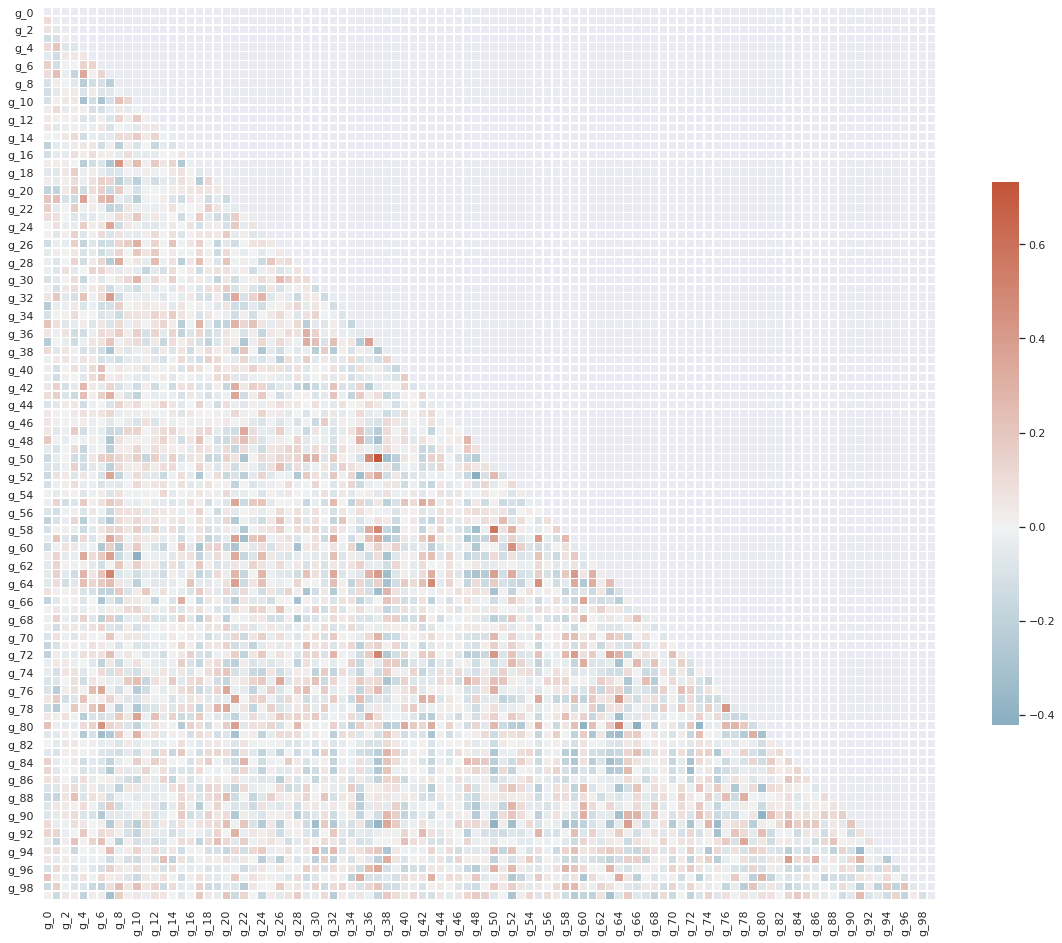

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Podemos ver então, que apesar de estarem padronizadas, a correlação do conjunto não passa de 0.7 nem de -0.5.

###4.1.3 C-n's

Vamos fazer o mesmo para para as categorias c-n's, calcular a correlação e depois plotar o *headtmap()* 

In [ ]:
corr_celular = data.loc[:,'c_0':'c_99'].corr()

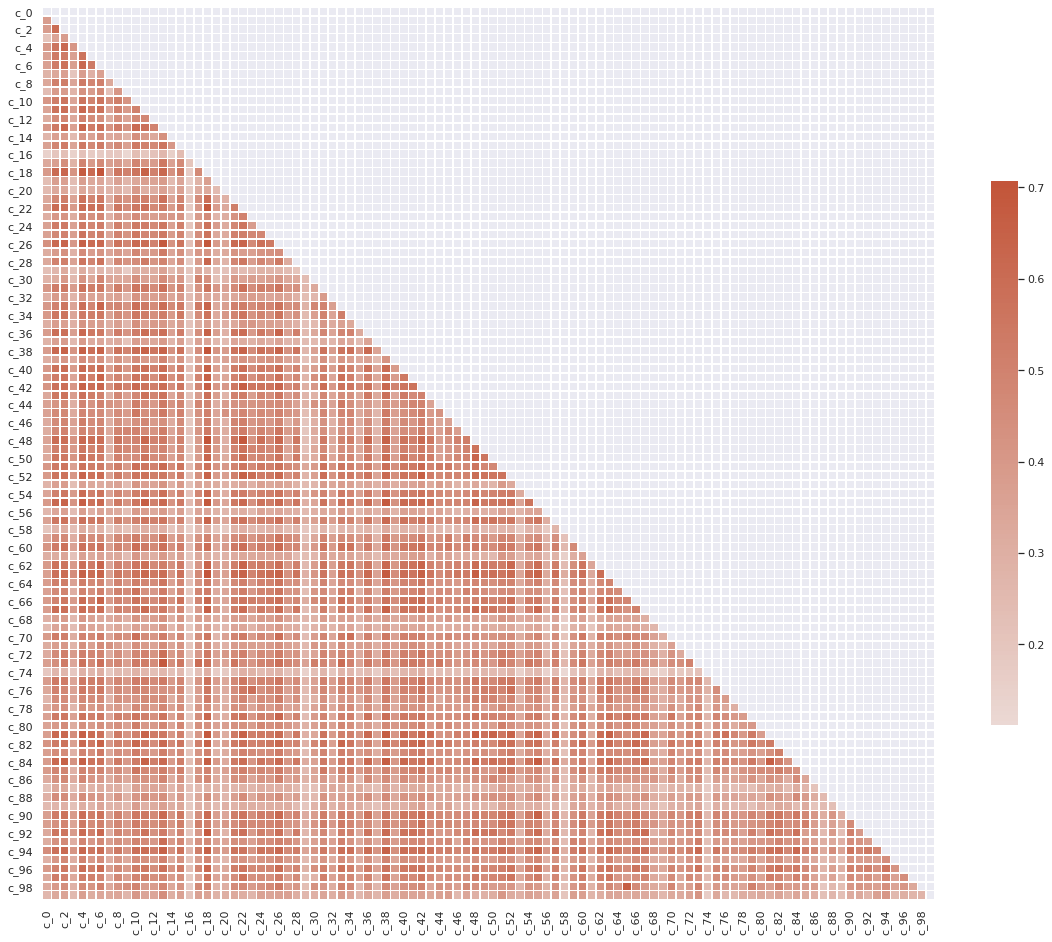

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Como podemos ver, há uma bela diferença em relação as g-n's, já que não há nenhuma dupla de variáveis com correlação abaixo de 0.1. 


> *Um ponto a ser lembrado é correlação não implica causualidade, como se trata de uma fórmula matemática, ela apenas mostra o quanto uma variável varia com a outra, porém os motivos podem ser variados e precisariamos de mais informações sobre cada gene/célula para sabe se o motivo da correlação alta vem da mesma causa*



###4.1.4 G-n's x C-n's

Tendo em vista que as variáveis g-n's se comportam de uma forma entre elas e as c-n's se comportam de outra, como será que uma se comporta em relação a outra? para fazer isso, utilizaremos as 50 últimas colunas dos g-n's e as 50 primeiras dos c-n's e usaremos a função *loc[]* para selecionar as linhas e as colunas.

In [ ]:
corr = data.loc[:,'g_721':'c_50'].corr()
corr_celular_genes = corr.loc['g_721':'g_771','c_0':'c_50']

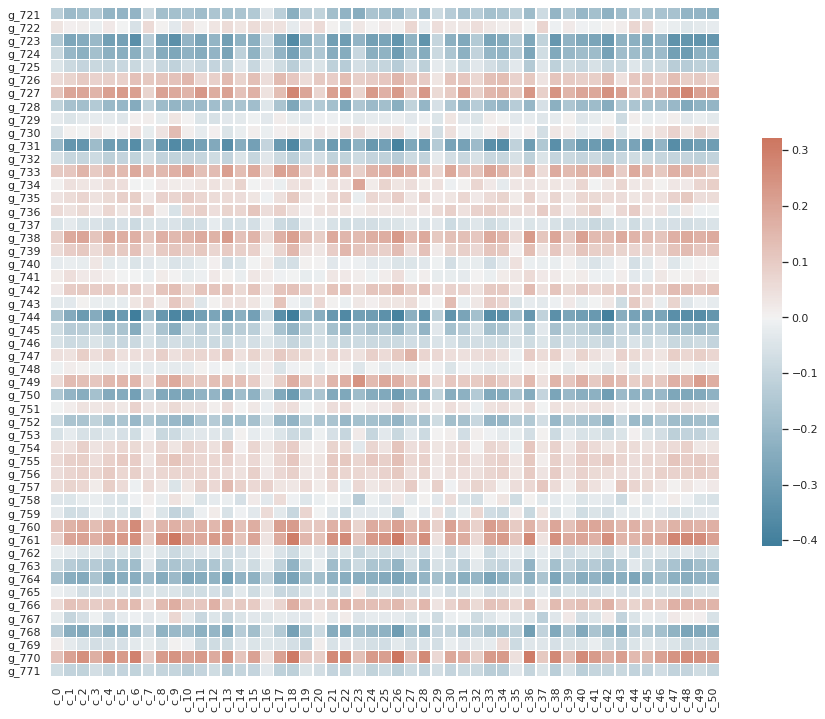

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular_genes, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se olharmos para essa figura, podemos ver algo curioso: um gene possui uma correlação parecida com todas as células. Isso porque genes são segmentos de DNA que contém o código de uma proteína em um ou mais tipos de células do organismos, fazendo com que a resposta do gene à droga seja parecida em grande parte das células.

## 4.2 Relação com a variável alvo

Saber quais variáveis  e como se relacionam com seu alvo é muito importânte para entender seus dados e na hora de escolher quais entregar as variáveis para o modelo.

###4.2.1 Dose X Tempo X Rna polymerase inhibitor

Como se tratam de variáveis categóricas de baixa cardinalidade, podemos utilizar o *crosstab()* novamente para analisar de maneira única. Usaremos somente os dados que não foram de controle, já que testes de controle não devem possui essa característica

In [ ]:
pd.crosstab([data.query('tratamento == "com_droga"')['dose'], data.query('tratamento == "com_droga"')['tempo']],  data['rna_polymerase_inhibitor'], normalize='columns')

rna_polymerase_inhibitor         0     1
dose tempo                              
D1   24                   0.164321  0.16
     48                   0.180916  0.20
     72                   0.160221  0.16
D2   24                   0.165407  0.16
     48                   0.165506  0.16
     72                   0.163629  0.16

Apesar de aparentar ter uma leve alteração nas coluna de resultado positivo, vale lembrar que há uma amostra muito pequena para afirmar que há alguma relação. De resto, estão mto bem distribuidas.

###4.2.2 G-n's x Rna polymerase inhibitor

Para análisar a relação entre os g-n's e nossa variável alvo, usaremos o *describe()* novamente, porem dessa vez separando de acordo com o resultado.

In [ ]:
g_describe_0 = data.query('rna_polymerase_inhibitor == 0').loc[:, 'g_0': 'g_771'].describe().T
g_describe_0.head()

,count,mean,std,min,25%,50%,75%,max
g_0,22097.0,0.005433,0.837145,-5.513,-0.4993,-0.0596,0.4107,7.095
g_1,22097.0,-0.096499,0.743965,-5.596,-0.5408,-0.0477,0.3839,5.039
g_2,22097.0,0.104498,1.000252,-9.104,-0.4626,0.0340,0.6091,6.226
g_3,22097.0,0.037508,0.767408,-4.927,-0.4180,0.0000,0.4274,10.000
g_4,22097.0,-0.034774,0.857879,-6.369,-0.4863,-0.0575,0.3872,6.511


In [ ]:
g_describe_1 = data.query('rna_polymerase_inhibitor == 1').loc[:, 'g_0': 'g_771'].describe().T
g_describe_1.head()

,count,mean,std,min,25%,50%,75%,max
g_0,25.0,1.398504,2.794183,-0.6905,-0.2296,0.0967,0.8771,9.1370
g_1,25.0,-0.012664,0.752926,-2.1510,-0.4663,0.1544,0.4511,0.9564
g_2,25.0,0.719024,1.267041,-1.3430,-0.0721,0.6622,1.0300,4.1510
g_3,25.0,-0.213656,1.005590,-3.6590,-0.4939,0.0071,0.4131,1.0580
g_4,25.0,0.943116,1.618908,-1.0310,-0.0544,0.5175,1.0940,5.3850


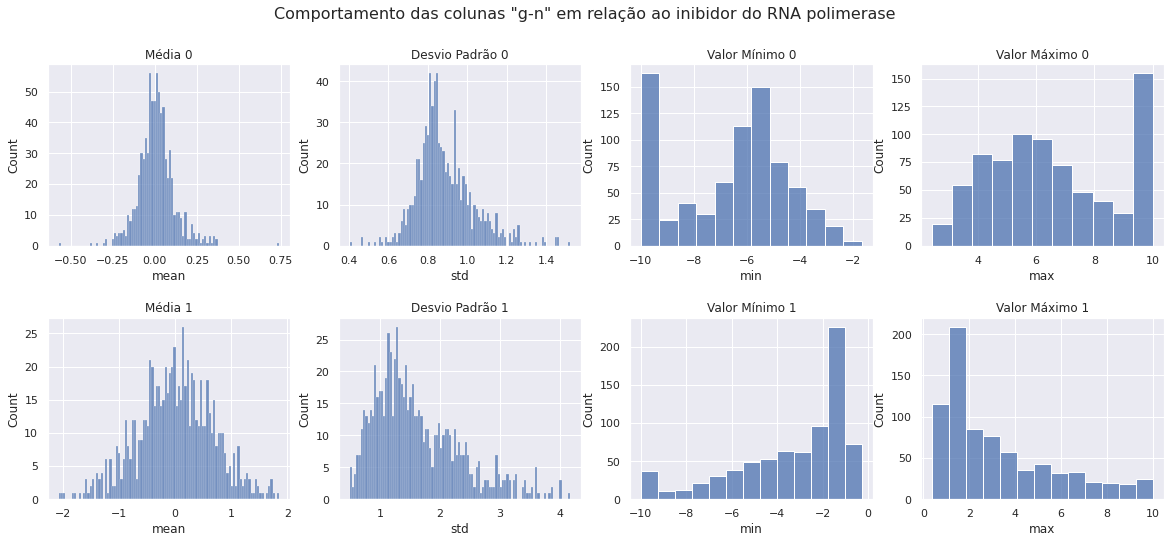

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle('Comportamento das colunas "g-n" em relação ao inibidor do RNA polimerase ', fontsize = 16)
plt.subplots_adjust(hspace = 0.4)
sns.set()

sns.histplot(ax=axes[0][0], x = g_describe_0['mean'], bins = 100)
axes[0][0].set_title('Média 0', fontsize = 12)

sns.histplot(ax=axes[0][1], x = g_describe_0['std'], bins = 100)
axes[0][1].set_title('Desvio Padrão 0', fontsize = 12)

sns.histplot(ax=axes[0][2], x = g_describe_0['min'])
axes[0][2].set_title('Valor Mínimo 0', fontsize = 12)

sns.histplot(ax=axes[0][3], x = g_describe_0['max'])
axes[0][3].set_title('Valor Máximo 0', fontsize = 12)

sns.histplot(ax=axes[1][0], x = g_describe_1['mean'], bins = 100)
axes[1][0].set_title('Média 1', fontsize = 12)

sns.histplot(ax=axes[1][1], x = g_describe_1['std'], bins = 100)
axes[1][1].set_title('Desvio Padrão 1', fontsize = 12)

sns.histplot(ax=axes[1][2], x = g_describe_1['min'])
axes[1][2].set_title('Valor Mínimo 1', fontsize = 12)

sns.histplot(ax=axes[1][3], x = g_describe_1['max'])
axes[1][3].set_title('Valor Máximo 1', fontsize = 12)

plt.show()

Algumas coisas que podemos notar:


1.   No desvio padrão, apesar de ambos ficarem próximos de 1, o intervalo dos resultados positivos é bem maior, chegando até 4;
2.   Os valores de mínimo e máximo também são divergentes. Enquanto a minoria dos resultados negativos ficam em -2 e 2, nos positivos, a maioria ficam nesses valores.



###4.2.3 C-n's x Rna polymerase inhibitor

Vamos realizar o mesmo procedimento com as colunas c-n's

In [ ]:
c_describe_0 = data.query('rna_polymerase_inhibitor == 0').loc[:, 'c_0': 'c_99'].describe().T
c_describe_0.head()

,count,mean,std,min,25%,50%,75%,max
c_0,22097.0,-0.016270,0.750936,-8.500,-0.4323,0.0440,0.4792,2.989
c_1,22097.0,-0.037424,0.926861,-9.260,-0.4124,0.0642,0.5026,3.763
c_2,22097.0,-0.043544,0.889076,-9.380,-0.4278,0.0534,0.4898,2.831
c_3,22097.0,-0.073046,0.778387,-10.000,-0.4747,0.0162,0.4391,2.408
c_4,22097.0,-0.054017,0.945549,-9.045,-0.4289,0.0640,0.4987,4.555


In [ ]:
c_describe_1 = data.query('rna_polymerase_inhibitor == 1').loc[:, 'c_0': 'c_99'].describe().T
c_describe_1.head()

,count,mean,std,min,25%,50%,75%,max
c_0,25.0,-0.564292,1.838613,-5.705,-0.7087,0.0431,0.4219,1.5880
c_1,25.0,-1.736760,3.625777,-9.536,-0.9868,-0.0369,0.5280,0.8606
c_2,25.0,-1.319916,3.097851,-8.809,-0.6951,-0.1118,0.4758,0.8226
c_3,25.0,-0.915412,2.089956,-5.975,-1.0400,-0.2110,0.2605,1.4340
c_4,25.0,-1.217004,3.230417,-9.908,-0.6075,0.0328,0.5492,1.2560


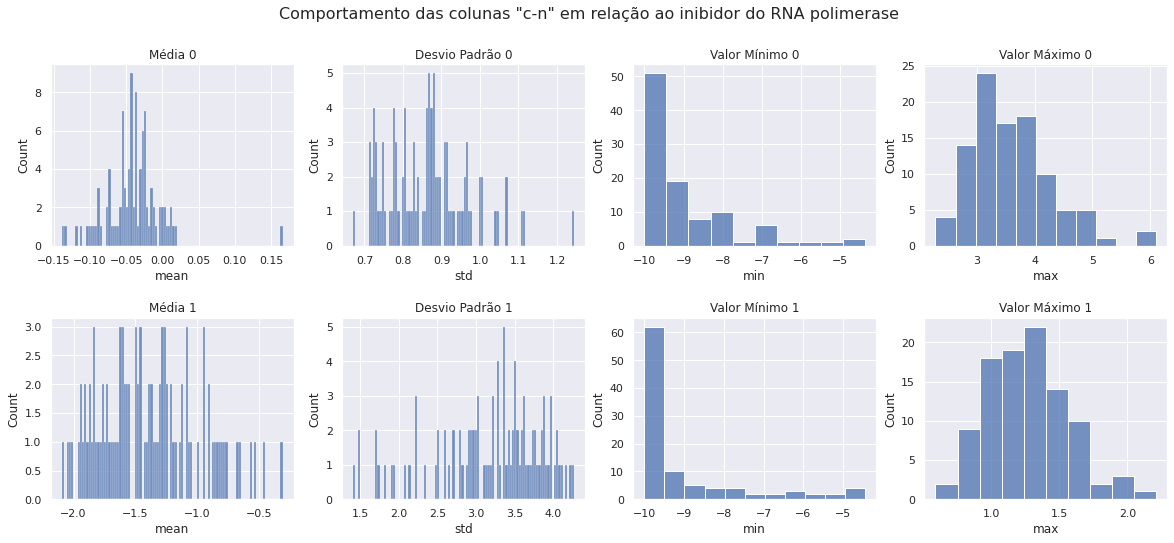

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle('Comportamento das colunas "c-n" em relação ao inibidor do RNA polimerase ', fontsize = 16)
plt.subplots_adjust(hspace = 0.4)
sns.set()

sns.histplot(ax=axes[0][0], x = c_describe_0['mean'], bins = 100)
axes[0][0].set_title('Média 0', fontsize = 12)

sns.histplot(ax=axes[0][1], x = c_describe_0['std'], bins = 100)
axes[0][1].set_title('Desvio Padrão 0', fontsize = 12)

sns.histplot(ax=axes[0][2], x = c_describe_0['min'])
axes[0][2].set_title('Valor Mínimo 0', fontsize = 12)

sns.histplot(ax=axes[0][3], x = c_describe_0['max'])
axes[0][3].set_title('Valor Máximo 0', fontsize = 12)

sns.histplot(ax=axes[1][0], x = c_describe_1['mean'], bins = 100)
axes[1][0].set_title('Média 1', fontsize = 12)

sns.histplot(ax=axes[1][1], x = c_describe_1['std'], bins = 100)
axes[1][1].set_title('Desvio Padrão 1', fontsize = 12)

sns.histplot(ax=axes[1][2], x = c_describe_1['min'])
axes[1][2].set_title('Valor Mínimo 1', fontsize = 12)

sns.histplot(ax=axes[1][3], x = c_describe_1['max'])
axes[1][3].set_title('Valor Máximo 1', fontsize = 12)

plt.show()

Novamente, algumas diferenças são notadas:


1.   Primeiramente, enquanto a média dos testes negativos se manteve em 0, as dos teste positivos ficou próximo de -1,5
2.   Em relação ao desvio padrão, os positivos ficaram 3,25 enquanto os negativos se manteve próximo de 1.
3.   Os valores máximos não só divergem, como o maior valor dos resultados positivos não passa de 2,5, enquanto o menor valor dos negativos ficou maior que 2,5.



# 5. Feature Engineering

Modelos de Machine Learning nada mais são que modelos matemáticos e portanto só sabem trabalhar com números. Além disso, alguns modelos são extremamente sensíveis ao despadronização dos dados. Todos esses fatores influenciam na eficiência do modelo e por isso, nessa sessão iremos manipular os dados para um melhor aproveitamento do modelo.

## 5.1 Features Categóricas

Como comentado acima, dados categóricos devem ser transformados para dados numéricos. Usaremos o módulo *preprocessing* da biblioteca **Sklearn** para fazer essas manipulações. Não trataremos a coluna "id", já que se trata somente de um identificador do teste e não contribui para o teste.

Começando pela coluna "tratamento", temos que se trata de um coluna categórica de baixa cardinalidade e nominal (não apresenta relação de ordem entre elas), por isso, usaremos a função *get_dummies()* para se quebrar em duas colunas binárias que representa cada categoria. 

In [ ]:
data = data.join(pd.get_dummies(data['tratamento'])).drop('tratamento', 1)

data.head()

,id,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,g_35,...,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,rna_polymerase_inhibitor,com_controle,com_droga
0,id_000644bb2,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1
1,id_000779bfc,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1
2,id_000a6266a,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1
3,id_0015fd391,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1
4,id_001626bd3,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1


Apesar da coluna "tempo" poder apresentar uma relação de ordem, usaremos como uma coluna nominal também, portanto quebraremos em 3 colunas usando o *get_dummies()*

In [ ]:
data = data.join(pd.get_dummies(data['tempo'])).drop('tempo', 1)

data.head()

,id,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,g_35,g_36,...,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,rna_polymerase_inhibitor,com_controle,com_droga,24,48,72
0,id_000644bb2,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1,1,0,0
1,id_000779bfc,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,0,0,1
2,id_000a6266a,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,1,0
3,id_0015fd391,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,1,0
4,id_001626bd3,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,0,0,1


Para a coluna "dose" podemos usar a função *LabelEncoder()* já que trata de uma coluna com categorias ordinais. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['dose_num'] = le.fit_transform(data['dose'])
data.drop('dose', 1, inplace = True)

data.head()

,id,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,g_35,g_36,g_37,...,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,rna_polymerase_inhibitor,com_controle,com_droga,24,48,72,dose_num
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1,1,0,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,0,0,1,0
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,1,0,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,1,0,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,0,0,1,1


Para coluna "droga", usaremos o *BinaryEncoder()* da biblioteca **Category_encoders**. Por ser uma coluna de alta cardinalidade, se usarmos o *get_dummies()* irão surgir mais de 3 mil colunas, enquanto o *BinaryEncoder()* utiliza a codificação binária, podendo reduzir para 12 colunas 

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

binarying = ce.BinaryEncoder(cols = 'droga')

data = binarying.fit_transform(data)
data.head()

,id,droga_0,droga_1,droga_2,droga_3,droga_4,droga_5,droga_6,droga_7,droga_8,droga_9,droga_10,droga_11,droga_12,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,...,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,rna_polymerase_inhibitor,com_controle,com_droga,24,48,72,dose_num
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1,1,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,0,0,1,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,1,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,...,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,1,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,...,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,1,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,...,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,0,0,1,1


# 6. Seleção de Features

Existe um ditado muito famoso na comunidade de ciêntistas de dados chamado "Garbage in, garbage out", ou então, "Se entrar lixo, sairá lixo". Ou seja, se simplesmente colocarmos qualquer dado no modelo, não estariamos tendo o melhor resultados. Então devemos escolher as melhores variáveis para alimentar nosso modelo.

Como podemos ver, temos quase 900 variáveis para trabalhar, colocar todas elas para o modelo analizar, usariamos muito processamento e muito provavelmente não traria uma melhora tão relevante assim, ou até mesmo poderia piorar o resultado. Essa sessão será focada em escolher as melhores variáveis, coletando as que mais trazem informação, sem que haja um vazamento de dados.

##6.1 Vazamento de Dados

Vazamento de dados ocorre quando damos uma variável que da uma informação que permite o modelo "roubar", por exemplo, vimos que nenhum teste de controle recebe o resultado positivo, então se dessemos esse tipo de informação pro modelo poderá haver um vazamento de dados.

In [ ]:
features = pd.DataFrame(data.drop(columns = ['com_droga', 'com_controle']))

##6.2 Alta correlação

Podemos retirar algumas variáveis quando possuem uam correlação próxima dos extremos e que não trazem nenhuma informação. Por exemplo nas colunas "24h", "48h" e "72h" poderiamos retirar uma delas já que podemos representar os 3 estados somente com duas colunas. Retirando a coluna "72h", por exemplo, o estado "10" representa o tempo "24h", o "01" representa o tempo de "48h" e o estado "00" representa o teste de "72h".

In [ ]:
features = pd.DataFrame(features.drop(columns = 72))

##6.3 SelectKBest

Para as colunas continuas, usaremos a função *SelectKbest()* da biblioteca **Sklearn** para selecionar as 500 das 872 variáveis que possuem mais informação para colocar no modelo. 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

SKBest = SelectKBest(score_func = f_classif, k = 500)

X_selected = pd.DataFrame(SKBest.fit_transform(data.loc[:, 'g_0': 'c_99'], data['rna_polymerase_inhibitor']))

X_selected.shape

(22122, 500)

Vamos juntar agora, todas essas variaveis escolhidas

In [ ]:
features['24h'] = features[24].astype(int)
features['48h'] = features[48].astype(int)
features.drop(columns = [24, 48], inplace = True)
X_selected = pd.concat([X_selected, features.select_dtypes(int)], axis = 1)

Com essas técnicas aplicadas conseguimos reduzir 892 variáveis para 516! Que será um ganho de performance enorme!

# 7. Seleção do Modelo

A escolha do modelo certo é outra etapa fundamental do processo. Existem centenas deles e saber qual é o ideal para cada base de dados é um trabalho comum na vida do ciêntista de dados. Por isso nessa sessão iremos selecionar o melhor algoritmo para nossa base.

##7.1 Escolha da métrica

Mas antes de selecionarmos o modelo, precisamos saber como vamos avaliar ele, aliás, um método de avaliação falho não escolheria o melhor modelo. Começando pelo fato que será um modelo de classifícação, nossas opções variam entre "accuracy", "precission", "recall" etc. Porém temos que levar em consideração também que nossos dados da variável alvo, como visto na sessão 2.4, estão totalmente desbalanceados, em uma proporção 999 para 1, ou seja, se usarmos a acurácia como método de avaliação e o modelo chutasse tudo 0, o modelo teria algo em torno de 99,9% mesmo sendo algo ruim. Outro ponto, é que no contexto de descobrimento de novas drogas, como o percentual de descobrimento de novas drogas é bem baixo, temos que garantir que as drogas apontadas como positivo sejam realmente positivas. Do mesmo jeito, não queremos que nenhuma droga que possua a característica seja passda também.

Tendo tudo isso em mente, usaremos a métrica "f1_score" que é calculada a partir da média harmônica entre "precision" e "recall", fazendo uma balanço entre os dois.

In [ ]:
from sklearn.metrics import f1_score

##7.2 Importando e alimentado modelos

Agora que já decidimos nossas variáveis e nosso sistema de avaliação, podemos começar a importar e alimentar os modelos. Quando se trata de modelos de classificação, os principais modelos são *LogisticRegression()*, *SuportVectorMachine()*, *GaussianNB()*, *DecisionTreeClassifier()* e *RandomFlorestClassifier()*. Como já comentado, existem centenas de modelos, porém, para esse projeto, testaremos esses citados 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter = 1000)
svm = SVC()
gs = GaussianNB()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

Para alimentar os modelos, basta utilizar a função *fit()*, porém como temos que testar nossos dados, dividiremos nosso conjunto de dados em um dataset de treino e em um dataset de teste utilizando a função *StratifiedKFold()*, para que podemos realizar 5 testes e usar a média como o resultado. Além disso, devemos garantir duas coisas, a primeira é nossos dados sejam pegos de maneira aleatória e para garantir isso, basta alterar o parâmetro *Shuffle* para *True*. A segunda, é que queremos que todos os dados recebam os mesmos cojuntos de dados aleatórios, por isso colocaremos o parâmetro "random_state" para 0. Outro ponto que temos ter em nossa visão é o desbalanceamento das classes, para isso, usaremos o *SMOTE* da biblioteca **imbalanced_learn** no qual gera pontos da classe menor para diminuir esse desbalanceamento.

In [ ]:
from sklearn.model_selection import StratifiedKFold

A biblioteca **imbalanced_learn** não está no pacote do google colabs, então precisamos instalar.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

over = SMOTE(sampling_strategy=0.3, random_state = 0)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

Finalmente, vamos alimentar nosso modelo.

In [ ]:
from statistics import mean

X = X_selected.drop(columns = 'rna_polymerase_inhibitor')
y = X_selected['rna_polymerase_inhibitor']

models = [lr, svm, gs, tree, rf]
for model in models:
  scores = []
  for train_index, test_index in skf.split(X_selected,X_selected['rna_polymerase_inhibitor']):
    X_train = X[X.index.isin(train_index)]
    y_train = y[y.index.isin(train_index)]
    X_test = X[X.index.isin(test_index)]
    y_test = y[y.index.isin(test_index)]
    X_train, y_train = over.fit_resample(X_train, y_train)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    scores.append(f1_score(y_test, predictions, average = 'macro'))
      
  print('O modelo {} teve um score de {}'.format(model, mean(scores)))

O modelo LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) teve um score de 0.5845391334738561
O modelo SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) teve um score de 0.4997173160823759
O modelo GaussianNB(priors=None, var_smoothing=1e-09) teve um score de 0.4982657636904274
O modelo DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
     

Como podemos ver, nosso melhor modelo foi o *RandomForest()*, porém, 0,627 pode não ser a melhor eficiência. Veremos na próxima sessão, como melhorar.

# 8. Seleção de Hiperparametros

Hiperparâmetros são os valores que fazemos nos parâmetros do modelo, para que ele tenha um melhor entendimento dos dados e melhor desempenho. Nessa sessão escolheremos os hiperparâmetros do modelo de *RandomFlorest()* a dedo para obter o melhor desempenho.

##8.1 n_estimators

O parâmetro *n_estimators* informa o número de árvores que o modelo vai criar. Caso não modificado, serão criadas 100 árvores, que foi o caso do nosso modelo anterior. 

Para escolher o melhor número para esse parâmetro, usaremos a função *validation_curve()* da biblioteca **yellowbrick**, onde será gerado um gráfico de desempenho de acordo com o número de árvores escolhidos. 

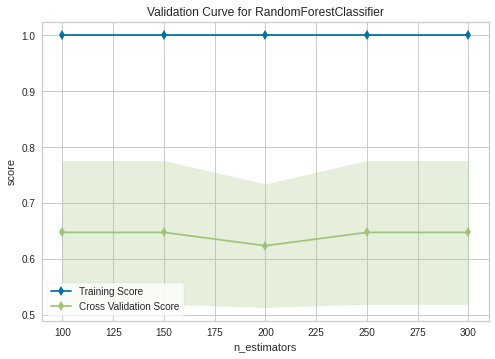

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
from yellowbrick.model_selection import validation_curve 

print(validation_curve(
    rf, X = X, y = y, param_name = "n_estimators", param_range = [100, 150, 200, 250, 300],
    scoring = "f1_macro", n_jobs = -1, cv = 5))

podemos ver que em 300 tivemos nosso melhor desempenho.

##8.2 max_depth

Outro parâmetro para alterar é o *max_depth()* o qual representa a maior profundidade que as árvores do modelo pode ir. No nosso primeiro modelo ele estava como None, ou seja, as árvores poderiam crescer o quanto quisessem 

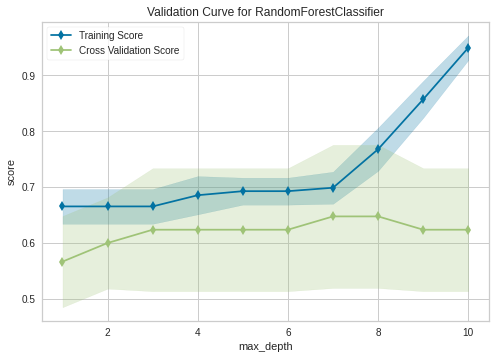

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
rf = RandomForestClassifier(n_estimators = 300)

print(validation_curve(
    rf, X = X, y = y, param_name = "max_depth", param_range = np.arange(1, 11),
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Para esse parâmentro temos o 7 como o melhor. A partir do 8 podemos ver uma melhora no resultado dos treinos, porém mantém o resultado nos testes e quando isso ocorre, chamamos de Overfitting, ou super adequamento.

##8.3 min_sample_splits

O terceiro parâametro a ser mexido é o *min_sample_split* que mostra o número mínimo de amostra que deve ter na folha para realizar a divisão. Por padrão, está ajustado como dois, mas vamos ver se esse valor realmente é o melhor.

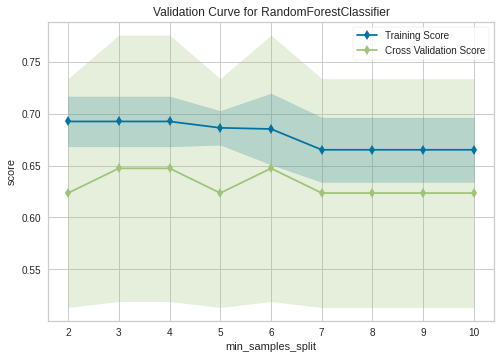

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 7)

print(validation_curve(
    rf, X = X, y = y, param_name = "min_samples_split", param_range = np.arange(1, 11),
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Como podemos ver, temos três opções nesse momento, porém como números maiores tendem a diminuir a performance, manteremos o número 3

##8.4 min_sample_leafs

Por fim, o *min_sample_leaf* ajusta o número mínimo de pontos que precisam para poder ser uma folha. Por padrão esse parâmetro está configurado para 1

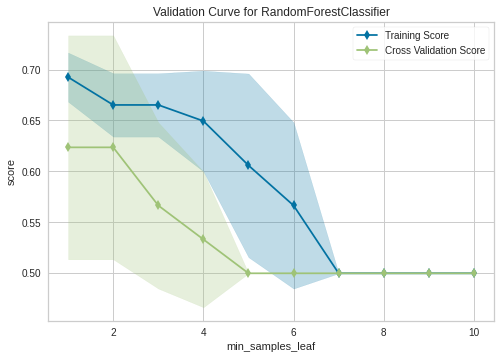

AxesSubplot(0.125,0.125;0.775x0.755)


In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 7, min_samples_split = 3)

print(validation_curve(
    rf, X = X, y = y, param_name = "min_samples_leaf", param_range = np.arange(1, 11),
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Podemos ver então que nosso último hiperparâmetro é o 1 e com isso nosso modelo fica pŕoximo da pontuação 0.63

# 9. Conclusão

Conseguimos chegar a um modelo final com f1_score de 0.63, o que pode ser considerado um modelo razoável dado as proporções da nossa variável alvo. Há muitas coisas que podem ser melhoradas como um melhor entendimento de cada um dos 772 genes, das 100 células e como eles se relacionam entre si. Além disso, procurar utilizar técnicas mais avançadas de dados desbalanceados ou até mesmo outras técnicas ajustar os hiperparâmetros como Gridsearch, por exemplo.

Vale ressaltar também que descobrir novas substâncias que apresentam tal característica é só um dos passos feitos no descobrimento de novas drogas.

# 10. Fontes

[1] https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit

[2] https://www.boehringer-ingelheim.com.br/pesquisa-e-inovacao/pesquisa-e-inovacao/drug-discovery-process

[3] https://www.saude.pr.gov.br/Pagina/Tuberculose

[4] https://www1.folha.uol.com.br/fsp/mundo/ft0507200105.htm
